# Walmart Sales Prediction

In [1]:
# Importing libraries and data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
import seaborn as sns
from tqdm import tqdm
from datetime import date
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing
import holidays
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from tensorflow.keras.models import load_model
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_stores = pd.read_csv('F:\\Akash\\New folder\\Project 2\\data\\stores.csv')
df_features = pd.read_csv('F:\\Akash\\New folder\\Project 2\\data\\features.csv')
df_train = pd.read_csv('F:\\Akash\\New folder\\Project 2\\data\\train.csv')
df_test = pd.read_csv('F:\\Akash\\New folder\\Project 2\\data\\test.csv')

## Data Observation

### stores

In [3]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
df_stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [5]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
#how many data point for each store type present
df_stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

Text(0, 0.5, 'Number of Stores ')

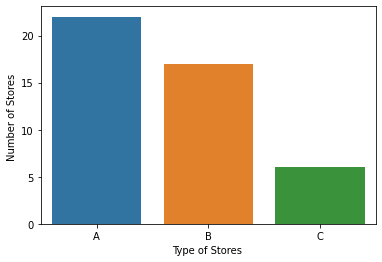

In [7]:
x = np.array(df_stores['Type'].value_counts().index)
y = np.array(df_stores['Type'].value_counts().values)
sns.barplot(x,y)
plt.xlabel('Type of Stores ')
plt.ylabel('Number of Stores ')

<AxesSubplot:xlabel='Type', ylabel='Size'>

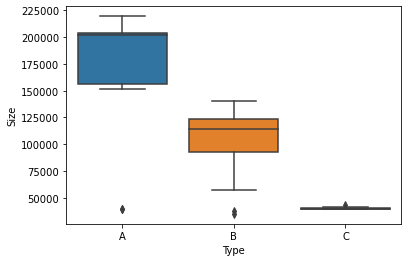

In [8]:
sns.boxplot(x='Type', y='Size', data=df_stores)

### Observations:

 there are less number of type c stores.

### features

In [9]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### train

In [10]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
df_train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [14]:
df_train['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

### test

In [15]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [16]:
df_test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


## Data Manipulation

In [18]:
#merge all features
df_features_stores = pd.merge(df_features,df_stores)
train = pd.merge(df_features_stores, df_train)
train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [19]:
train.shape

(421570, 16)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [21]:
test = pd.merge(df_features_stores, df_test)
test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,2
2,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,3
3,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,4
4,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,5


In [22]:
test.shape

(115064, 15)

In [23]:
train.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
Dept              int64
Weekly_Sales    float64
dtype: object

In [24]:
#Since the records are weekly, the "date" variable was converted to week of the year and year, as two new variables.
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month

train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week

train['Year'] = train['Date'].dt.year
test['Year'] = test['Date'].dt.year

train['day'] = train['Date'].dt.day
test['day'] = test['Date'].dt.day

# train = train.drop(['Date'], axis=1)
# test = test.drop(['Date'], axis=1)

In [25]:
# Creating a Function
def check_weekday(date):
      
    # computing the parameter date
    # with len function
    res=len(pd.bdate_range(date,date))
      
    if res == 0 :
        return 1
    else:
        return 0

In [26]:
check_weekday('2010-05-07')

0

## Feature Transformation

In [27]:
# # Print all the holidays in US in year 2018
year = [2010, 2011, 2012]
for i in year:
    for ptr in holidays.US(years = i).items():
        print(ptr)
    print("##################################################################")

(datetime.date(2010, 1, 1), "New Year's Day")
(datetime.date(2010, 12, 31), "New Year's Day (Observed)")
(datetime.date(2010, 1, 18), 'Martin Luther King Jr. Day')
(datetime.date(2010, 2, 15), "Washington's Birthday")
(datetime.date(2010, 5, 31), 'Memorial Day')
(datetime.date(2010, 7, 4), 'Independence Day')
(datetime.date(2010, 7, 5), 'Independence Day (Observed)')
(datetime.date(2010, 9, 6), 'Labor Day')
(datetime.date(2010, 10, 11), 'Columbus Day')
(datetime.date(2010, 11, 11), 'Veterans Day')
(datetime.date(2010, 11, 25), 'Thanksgiving')
(datetime.date(2010, 12, 25), 'Christmas Day')
(datetime.date(2010, 12, 24), 'Christmas Day (Observed)')
##################################################################
(datetime.date(2011, 1, 1), "New Year's Day")
(datetime.date(2011, 1, 17), 'Martin Luther King Jr. Day')
(datetime.date(2011, 2, 21), "Washington's Birthday")
(datetime.date(2011, 5, 30), 'Memorial Day')
(datetime.date(2011, 7, 4), 'Independence Day')
(datetime.date(2011, 9, 5),

In [28]:
holiday_train = train[['Date','Week','Year','IsHoliday']]
holiday_train = holiday_train.loc[holiday_train['IsHoliday']==True].drop_duplicates()

holiday_test = test[['Date','Week','Year','IsHoliday']]
holiday_test = holiday_test.loc[holiday_test['IsHoliday']==True].drop_duplicates()

holidays = pd.concat([holiday_train, holiday_test])
holidays

,Date,Week,Year,IsHoliday
73,2010-02-12,6,2010,True
2218,2010-09-10,36,2010,True
3014,2010-11-26,47,2010,True
3372,2010-12-31,52,2010,True
3800,2011-02-11,6,2011,True
5940,2011-09-09,36,2011,True
6731,2011-11-25,47,2011,True
7096,2011-12-30,52,2011,True
7527,2012-02-10,6,2012,True
9667,2012-09-07,36,2012,True


In [29]:
def holiday_type(x):
    if   (x['IsHoliday']== 1) & (x['Week']==6):
        return 1 #SuperBowl
    elif (x['IsHoliday']== 1) & (x['Week']==36):
        return 2 #LaborDay
    elif (x['IsHoliday']== 1) & (x['Week']==47):
        return 3 #Thanksgiving
    elif (x['IsHoliday']== 1) & (x['Week']==52):
        return 4 #Christmas
    else:
        return 0

In [30]:
#converting IsHoliday into 0 and 1
train['IsHoliday'] = train.apply(holiday_type, axis=1)
test['IsHoliday'] = test.apply(holiday_type, axis=1)

### Type

In [31]:
train['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [32]:
#converting store type A,B,C into 3,2,1
train['Type'] = train['Type'] .apply(lambda x: 3 if x == 'A' else 2 if x == 'B' else 1)
test['Type'] = test['Type'] .apply(lambda x: 3 if x == 'A' else 2 if x == 'B' else 1)

In [33]:
train.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
Month                0
Week                 0
Year                 0
day                  0
dtype: int64

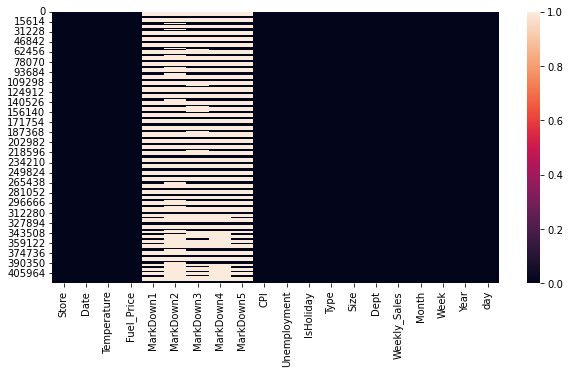

In [34]:
plt.figure(figsize = (10,5))
sns.heatmap(train.isnull());

In [35]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MarkDown2,310322,0.736110
MarkDown4,286603,0.679847
MarkDown3,284479,0.674808
MarkDown1,270889,0.642572
MarkDown5,270138,0.640790
Store,0,0.000000
Size,0,0.000000
Year,0,0.000000
Week,0,0.000000
Month,0,0.000000


since markdown 1 to 5 have more than 60 % missing values, are not strongly correlated to 'Weekly_sales' ie. it's diifficult to understand what they mean, so we can drop them.

In [36]:
train = train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)
test = test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [37]:
train.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Week,Year,day
0,1,2010-02-05,42.31,2.572,211.096358,8.106,0,3,151315,1,24924.50,2,5,2010,5
1,1,2010-02-05,42.31,2.572,211.096358,8.106,0,3,151315,2,50605.27,2,5,2010,5
2,1,2010-02-05,42.31,2.572,211.096358,8.106,0,3,151315,3,13740.12,2,5,2010,5
3,1,2010-02-05,42.31,2.572,211.096358,8.106,0,3,151315,4,39954.04,2,5,2010,5
4,1,2010-02-05,42.31,2.572,211.096358,8.106,0,3,151315,5,32229.38,2,5,2010,5


In [38]:
train.to_csv('train1.csv')

## Data Visualization

### Histogram

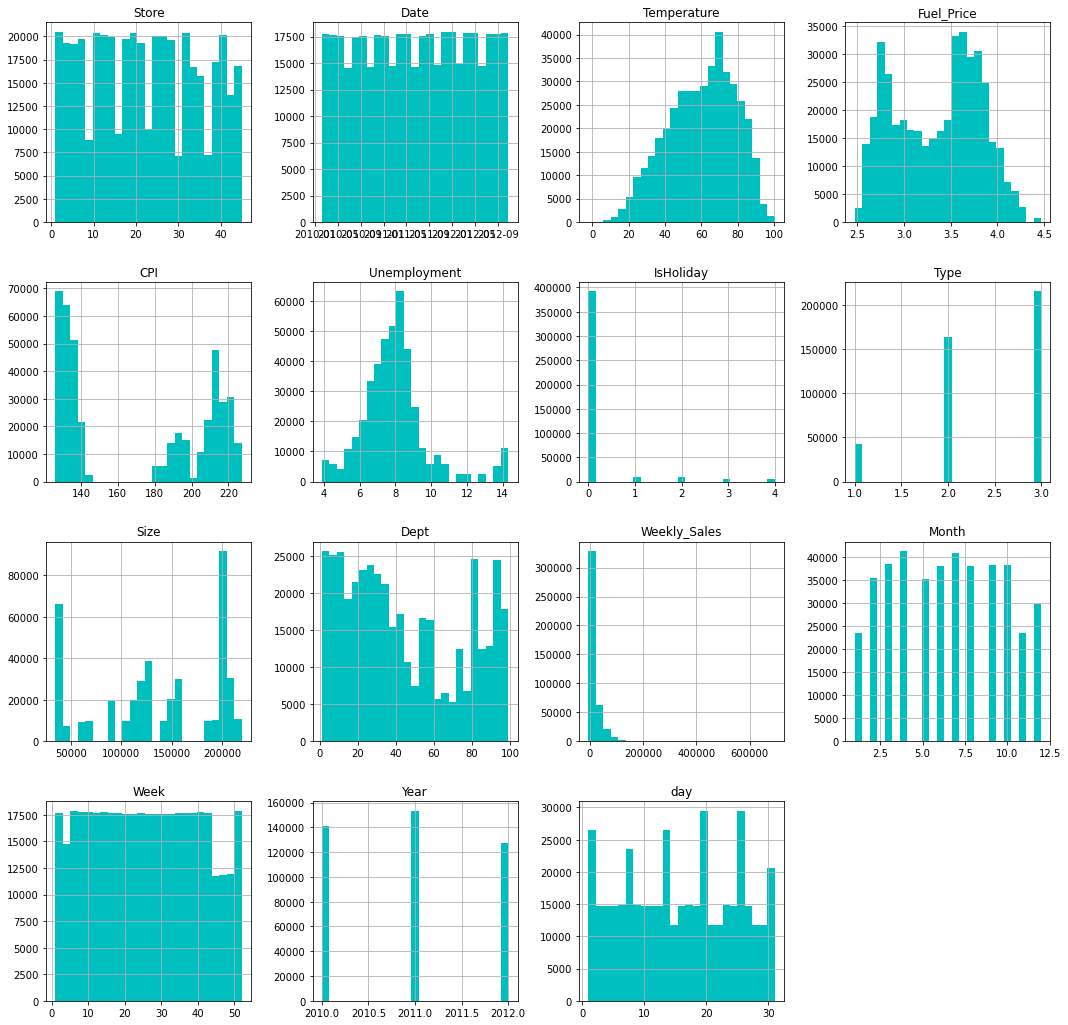

In [39]:
train.hist(bins = 25, figsize=(18, 18), color = 'c')
plt.show()

## Sales per IsHoliday

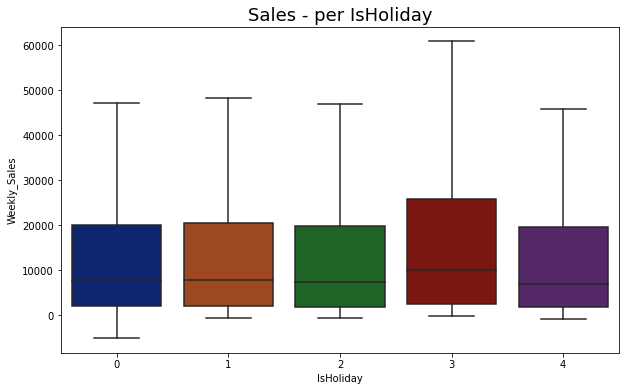

In [40]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(10,6))
sns.boxplot(x='IsHoliday',y='Weekly_Sales', data=train,palette='dark', showfliers=False)
plt.title('Sales - per IsHoliday', fontsize=18)
plt.show()
plt.show()

Sales in holiday(Thanksgiving) is more as compare to other days.

## Sales per Year

In [41]:
train.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

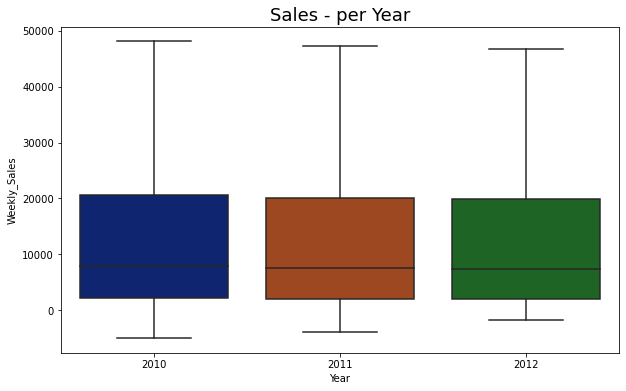

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Year',y='Weekly_Sales', data=train,palette='dark', showfliers=False)
plt.title('Sales - per Year', fontsize=18)
plt.show()
plt.show()

Sales obtain in year 2010 is slightly more as compared to other year.

## Sales per Month

<AxesSubplot:xlabel='Month'>

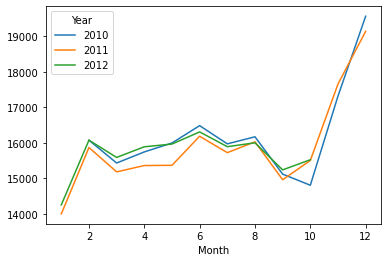

In [43]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

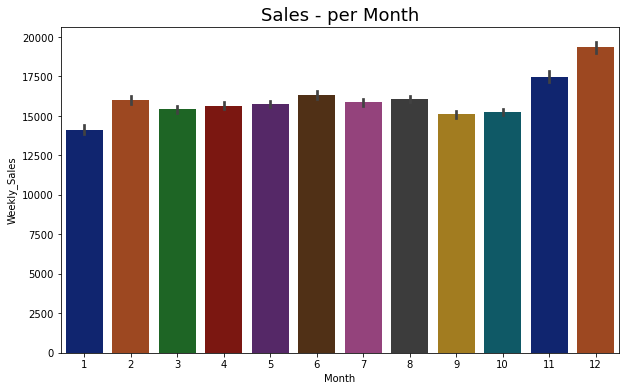

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month',y='Weekly_Sales', data=train,palette='dark')
plt.title('Sales - per Month', fontsize=18)
plt.show()
plt.show()

When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value.

## Sales per Week

<AxesSubplot:xlabel='Week'>

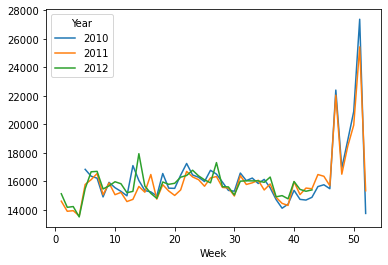

In [45]:
weekly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

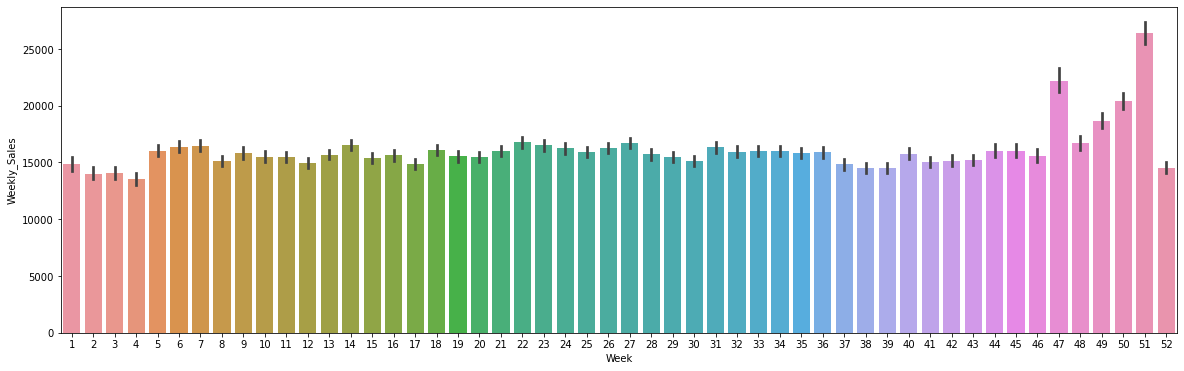

In [46]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=train)

From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

## Weekly sales per Store

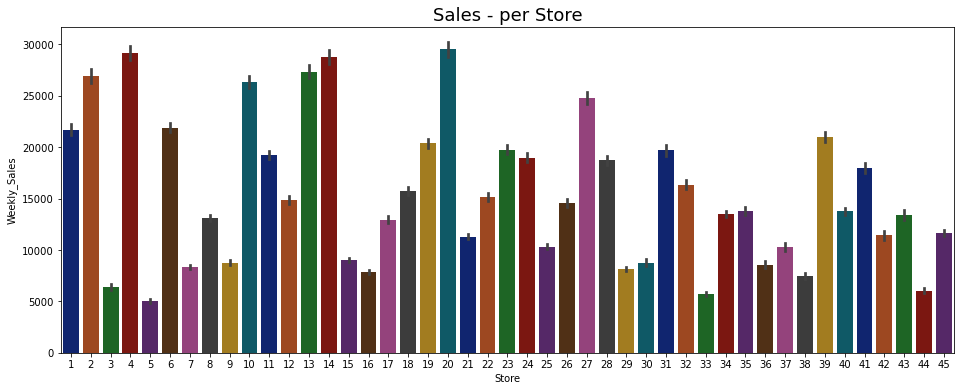

In [47]:
rcParams['figure.figsize'] = 16.0,6.0
sns.barplot(x = "Store", y = "Weekly_Sales", data = train, palette='dark')
plt.title('Sales - per Store', fontsize=18)
plt.show()

Analyzing the average weekly sales per store, there is a strong variation in sales volume between stores, ranging from 5000 up to 30000

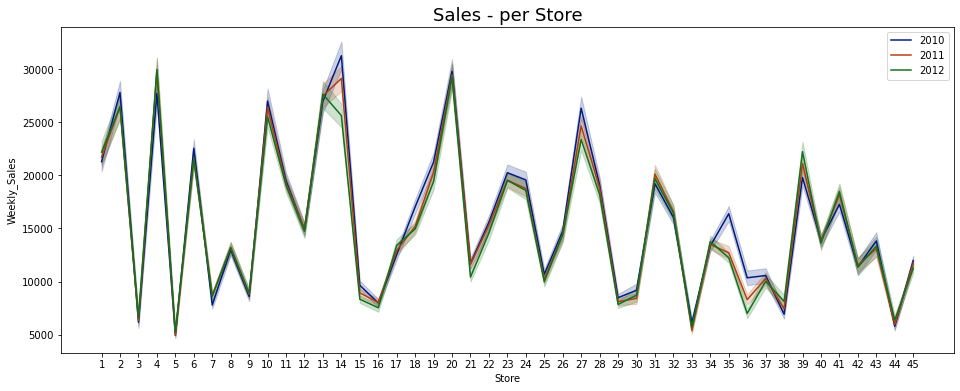

In [48]:
rcParams['figure.figsize'] = 16.0,6.0
sns.lineplot(x = "Store", y = "Weekly_Sales",hue='Year', data = train, palette='dark')
plt.title('Sales - per Store', fontsize=18)
plt.xticks(np.arange(1, 46, step=1))
plt.legend()
plt.show()

The behaviour of stores remain stable over the year. Some stores showed decrese in sales over the years such as stores 14,24,35.

## Weekly sales per Department

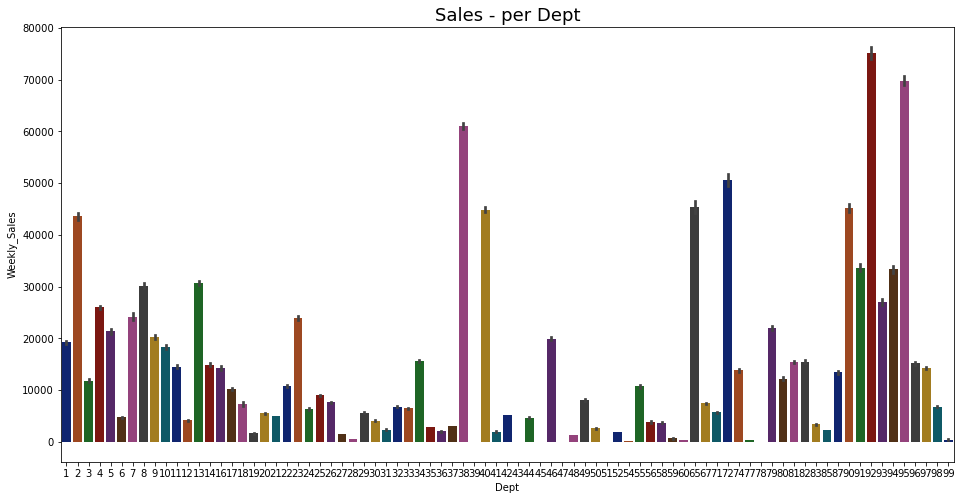

In [49]:
rcParams['figure.figsize'] = 16.0,8.0
sns.barplot(x = "Dept", y = "Weekly_Sales", data = train, palette='dark')
plt.title('Sales - per Dept', fontsize=18)
plt.show()

There are so much irregularities on weekly sales by department with average sales start from 0 to more than 70000.

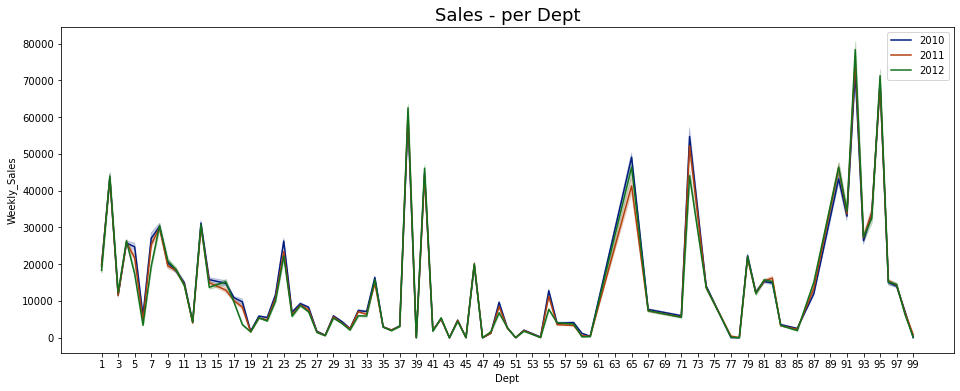

In [50]:
rcParams['figure.figsize'] = 16.0,6.0
sns.lineplot(x = "Dept", y = "Weekly_Sales",hue='Year', data = train, palette='dark')
plt.title('Sales - per Dept', fontsize=18)
plt.xticks(np.arange(1, 100, step=2))
plt.legend()
plt.show()

The behaviour of department remain stable over the year. Some department showed decrese in sales over the years such as department 65, 73.

## Sales per size

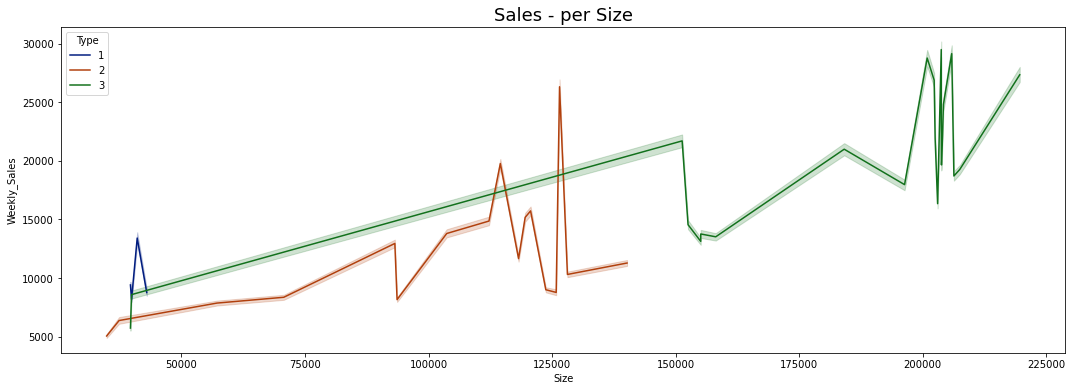

In [51]:
rcParams['figure.figsize'] = 18,6
sns.lineplot(x = "Size", y = "Weekly_Sales",hue='Type', data = train, palette='dark')
plt.title('Sales - per Size', fontsize=18)
plt.show()

The chart indicate there is trend towards higher sales for large stores.

## Sales per Type

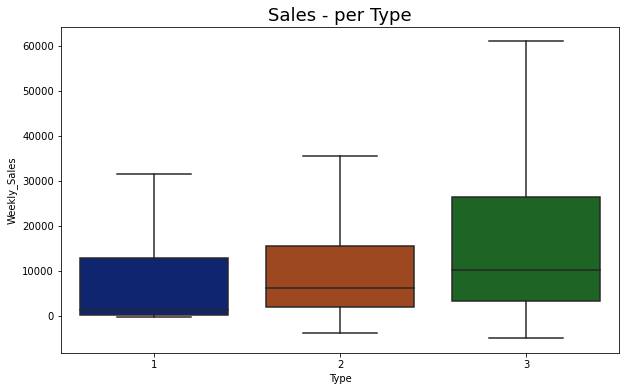

In [52]:
rcParams['figure.figsize'] = 10,6
sns.boxplot(x = "Type", y = "Weekly_Sales", data = train, palette='dark',showfliers = False)
plt.title('Sales - per Type', fontsize=18)
plt.show()

Type 3 has higher sales median than type 1 and type 2. Type 1 tends to have lower weekly sales.

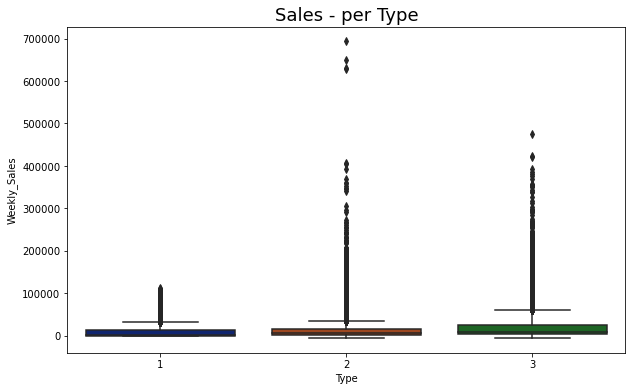

In [53]:
rcParams['figure.figsize'] = 10,6
sns.boxplot(x = "Type", y = "Weekly_Sales", data = train, palette='dark')
plt.title('Sales - per Type', fontsize=18)
plt.show()

Despite despersion around median Type 2 has many outlier records.

## Sales per Fuel Price

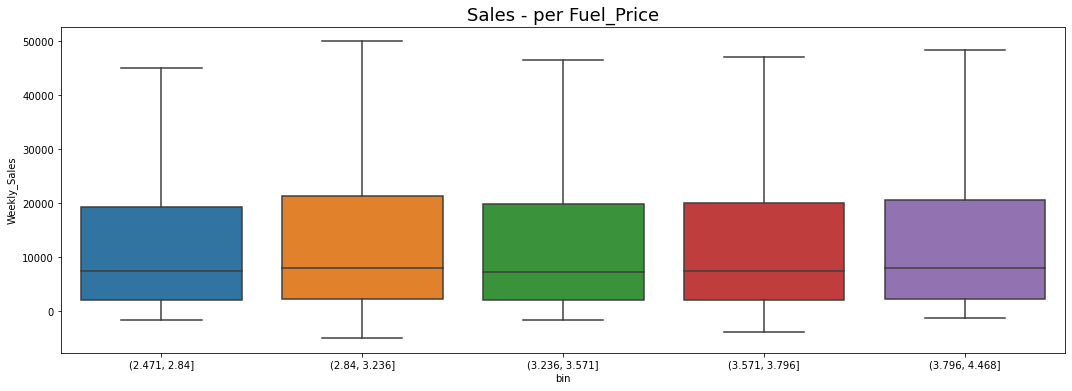

In [54]:
rcParams['figure.figsize'] = 18,6
df = train[['Fuel_Price', 'Weekly_Sales']]
df["bin"] = pd.qcut(df["Fuel_Price"], 5)
sns.boxplot(x="bin", y="Weekly_Sales", data=df, showfliers = False);
plt.title('Sales - per Fuel_Price', fontsize=18)
plt.show()

There is no such strong correlation between sales and fuel price but we can observe that sales is when fuel price is between 2.84 and 3.236.

## Sales per Temprature

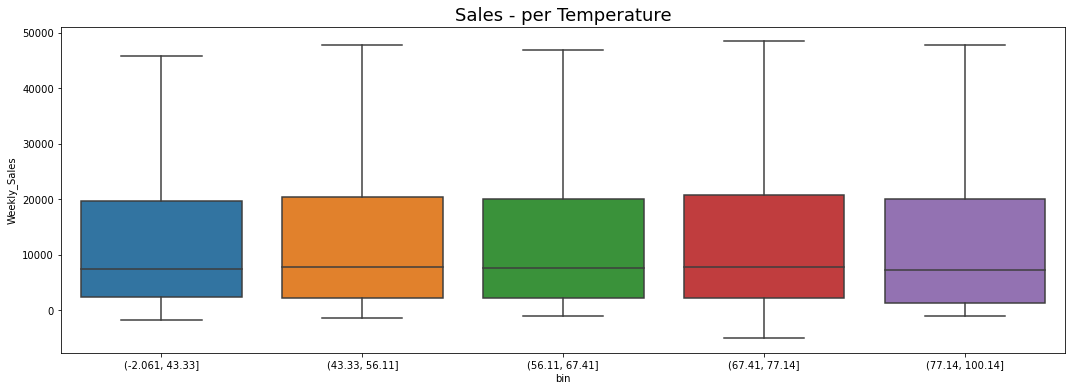

In [55]:
rcParams['figure.figsize'] = 18,6
df = train[['Temperature', 'Weekly_Sales']]
df["bin"] = pd.qcut(df["Temperature"], 5)
sns.boxplot(x="bin", y="Weekly_Sales", data=df, showfliers = False);
plt.title('Sales - per Temperature', fontsize=18)
plt.show()

Sales is high when temperature range is between 43.33 and 56.11.

## Scatter plot

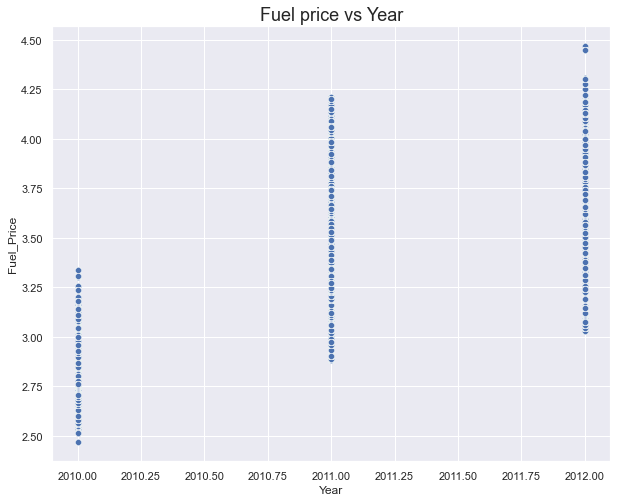

In [56]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(train['Year'],train['Fuel_Price'], palette="dark");
plt.title("Fuel price vs Year", fontsize=18)
plt.show()

As year increasing fuel price is also increasing.

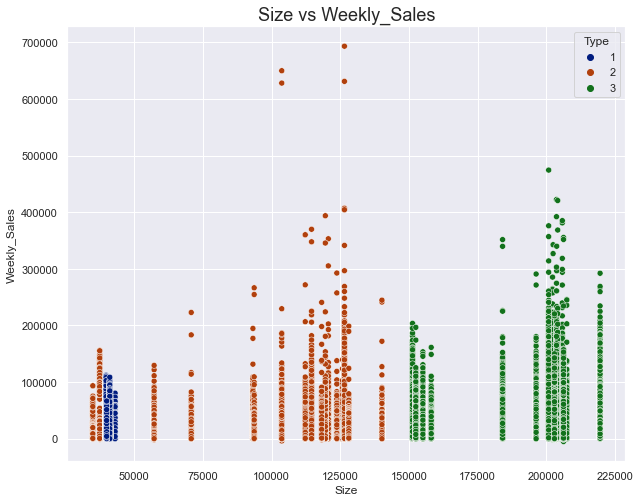

In [57]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(train['Size'],train['Weekly_Sales'], hue=train['Type'], palette="dark");
plt.title("Size vs Weekly_Sales", fontsize=18)
plt.show()

As size is increasing, sales is also increasing. Type 3 tends to have larger size which have more weekly sales apart from that there is some outliers are availabe in type 2.

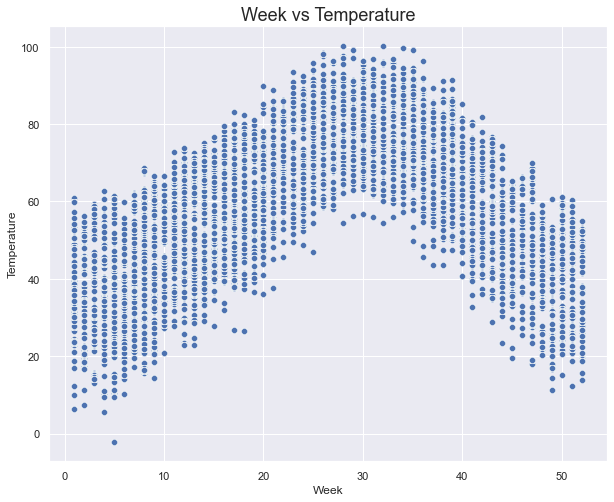

In [58]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(train['Week'],train['Temperature'], palette="dark");
plt.title("Week vs Temperature", fontsize=18)
plt.show()

There no such certain relationship between week and temperature but we can observe from the plot that temperature is high between week 20 and 40.

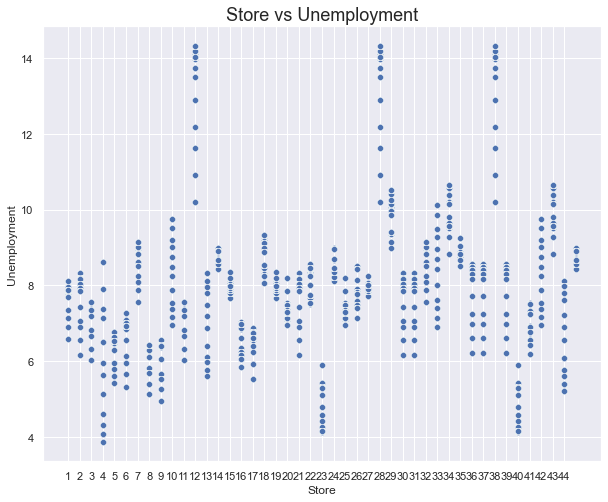

In [59]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(train['Store'],train['Unemployment'], palette="dark");
plt.xticks(np.arange(1, 45, step=1))
plt.title("Store vs Unemployment", fontsize=18)
plt.show()

From the above plot its difficult to conclude but we can observe that store 12,29, 38 have high unemployment.

## Correlation

In [60]:
# correlation between categorical variable
CrosstabResult=pd.crosstab(index=train['Type'],columns=train['Weekly_Sales'])
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.9999939893812583


Since P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other.

This means, if two variables are correlated, then the P-value will come very close to zero.

In [61]:
#correlation between categorical and numerical variable
c1 = ['IsHoliday','Type']
c2 = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size', 'Dept', 'Weekly_Sales', 'Month', 'Week',
       'Year', 'day']

for i in c1:
    for j in c2:
        CategoryGroupLists=train.groupby(i)[j].apply(list)
        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value > 0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        print('P-Value for Anova between {} and {} is:'.format(i,j), AnovaResults[1])
        if AnovaResults[1] < 0.05:
            print('{} and {} are correalted'.format(i,j))
        else:
            print('{} and {} are not correalted'.format(i,j))
        print(' ')
    print("###############################################################################################")

P-Value for Anova between IsHoliday and Store is: 0.9838567743096112
IsHoliday and Store are not correalted
 
P-Value for Anova between IsHoliday and Temperature is: 0.0
IsHoliday and Temperature are correalted
 
P-Value for Anova between IsHoliday and Fuel_Price is: 0.0
IsHoliday and Fuel_Price are correalted
 
P-Value for Anova between IsHoliday and CPI is: 0.08832768036473782
IsHoliday and CPI are not correalted
 
P-Value for Anova between IsHoliday and Unemployment is: 6.949396645131818e-26
IsHoliday and Unemployment are correalted
 
P-Value for Anova between IsHoliday and Size is: 0.9868138650722665
IsHoliday and Size are not correalted
 
P-Value for Anova between IsHoliday and Dept is: 0.961388206659232
IsHoliday and Dept are not correalted
 
P-Value for Anova between IsHoliday and Weekly_Sales is: 6.294017252104449e-103
IsHoliday and Weekly_Sales are correalted
 
P-Value for Anova between IsHoliday and Month is: 0.0
IsHoliday and Month are correalted
 
P-Value for Anova between 

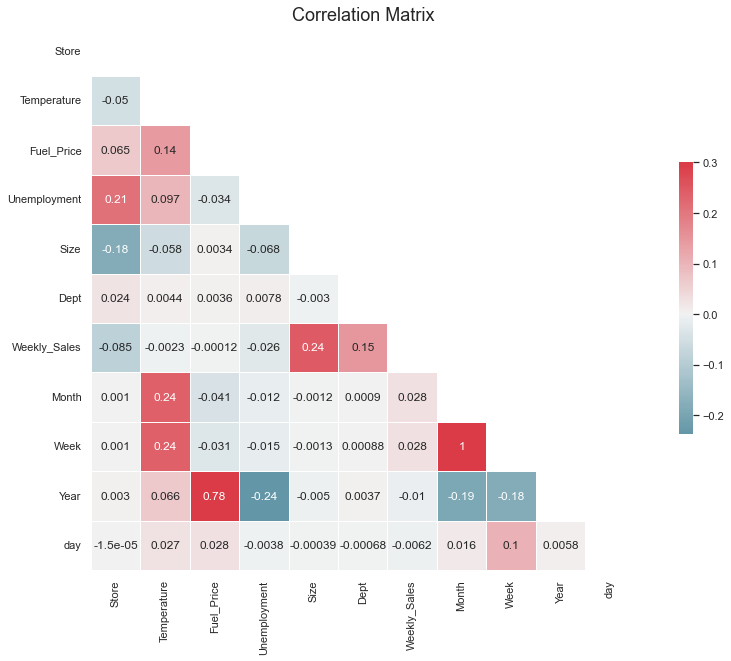

In [62]:
num_corr = train[['Store', 'Date','Temperature','Fuel_Price','Unemployment','Size','Dept','Weekly_Sales','Month','Week','Year','day']]
sns.set(style="white")
corr_num = num_corr.corr()
mask = np.triu(np.ones_like(corr_num, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr_num, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [63]:
corr_num['Weekly_Sales'].sort_values()

Store          -0.085195
Unemployment   -0.025864
Year           -0.010111
day            -0.006187
Temperature    -0.002312
Fuel_Price     -0.000120
Week            0.027673
Month           0.028409
Dept            0.148032
Size            0.243828
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

'Fuel_Price', 'Temperature', 'Date', 'CPI', 'Unemployment' have week negative correlation with 'Weekly_sales', so they will be dropped.

In [64]:
df_train_feats = train.drop(columns=['Fuel_Price', 'Temperature','Date', 'CPI', 'Unemployment'])
df_test_feats = test.drop(columns=['Fuel_Price', 'Temperature','Date', 'CPI', 'Unemployment'])

## Arima Model

In [65]:
df = pd.read_csv('train1.csv')

In [66]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [67]:
df.set_index('Date', inplace=True) #seting date as index

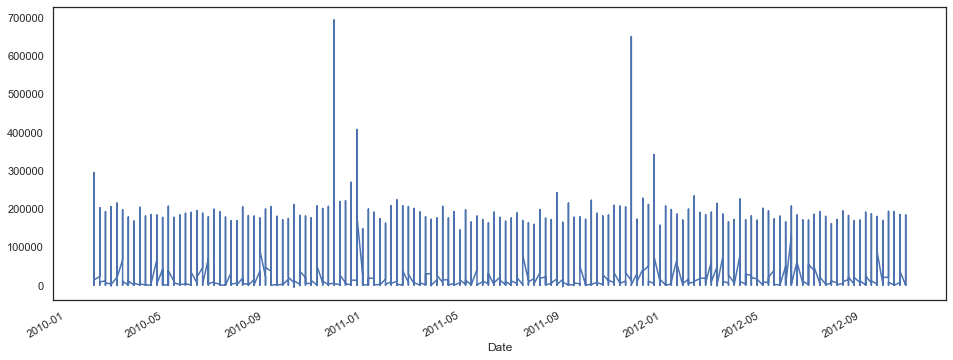

In [68]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [69]:
df_week = df.resample('W').mean() #resample data as weekly
print(df_week.shape)

(143, 15)


In [70]:
df_week.head()

,Unnamed: 0,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Week,Year,day
Date,,,,,,,,,,,,,,,
2010-02-07,204507.393232,22.038579,33.277942,2.717869,167.398405,8.576731,0.0,2.412183,137430.535364,44.181726,16836.121997,2.0,5.0,2010.0,5.0
2010-02-14,204359.014547,22.016915,33.361810,2.696102,167.384138,8.567309,1.0,2.414073,137622.780785,44.377199,16352.056032,2.0,6.0,2010.0,12.0
2010-02-21,204641.447430,22.038965,37.038310,2.673666,167.338966,8.576351,0.0,2.412160,137278.637219,44.305341,16216.658979,2.0,7.0,2010.0,19.0
2010-02-28,204720.032870,22.041681,38.629563,2.685642,167.691019,8.561375,0.0,2.412064,137346.344629,44.107421,14899.549688,2.0,8.0,2010.0,26.0
2010-03-07,204805.752038,22.043818,42.373998,2.731816,167.727351,8.572689,0.0,2.414062,137576.841033,44.045516,15921.015727,3.0,9.0,2010.0,5.0


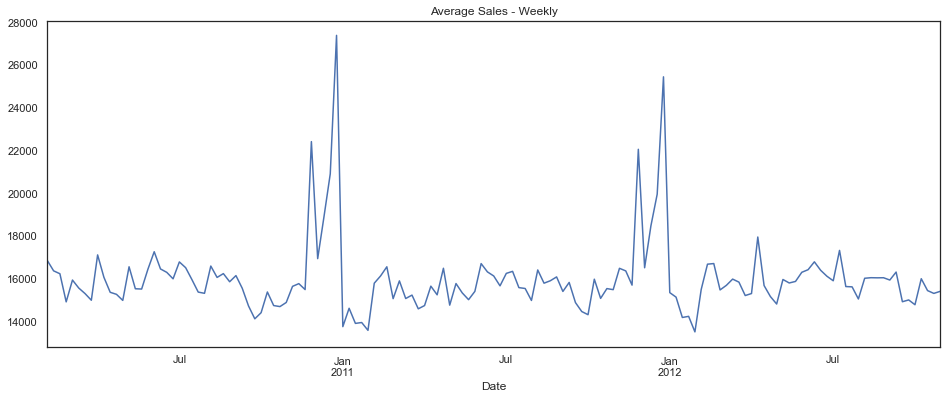

In [71]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [72]:
df_month = df.resample('MS').mean() # resampling as monthly
df_month.shape

(33, 15)

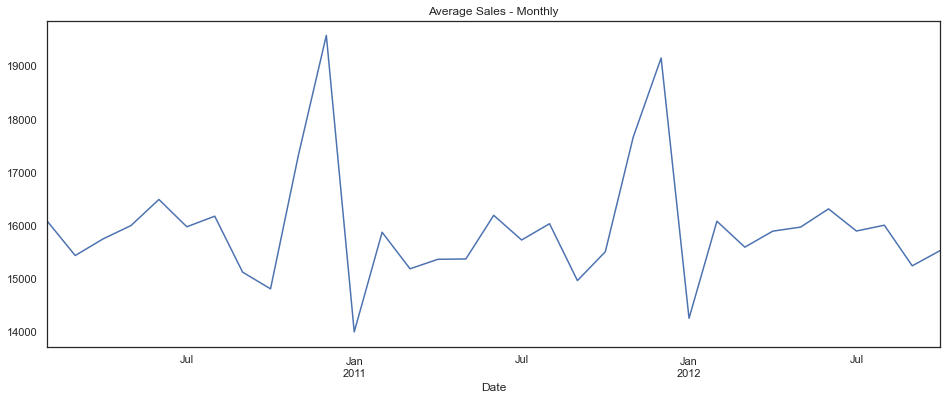

In [73]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_week['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.9308027447487035
p-value: 2.3832272706103574e-07
Critical Values:
	1%: -3.47864788917503
	5%: -2.882721765644168
	10%: -2.578065326612056


p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Here, p value is less than 0.05 ie data is stationary.

In [75]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 15)
Test: (43, 15)


In [76]:
X_train = train_data.drop(["Weekly_Sales"], axis=1)
X_test = test_data.drop(["Weekly_Sales"], axis=1)
y_train = train_data["Weekly_Sales"]
y_test = test_data["Weekly_Sales"]

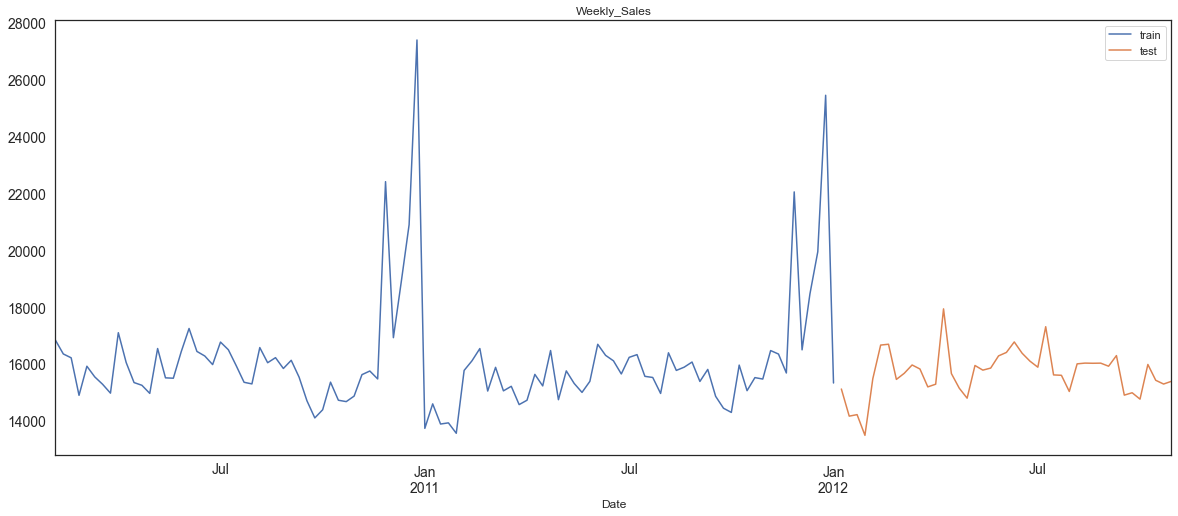

In [77]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.legend(['train', 'test'])
plt.show()

In [78]:
model_auto_arima = auto_arima(y_train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(y_train)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1812.876, Time=1.83 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1807.819, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1806.090, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=1806.426, Time=0.09 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=1784.615, Time=0.12 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.666, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1805.371, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1807.867, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1809.028, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1786.168, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1803.956, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1805.975, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1804.562, Time=0.40 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1802.056, Time=0.31 sec
 ARIMA(3,0,0)(0

ARIMA(maxiter=200, order=(0, 0, 4), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

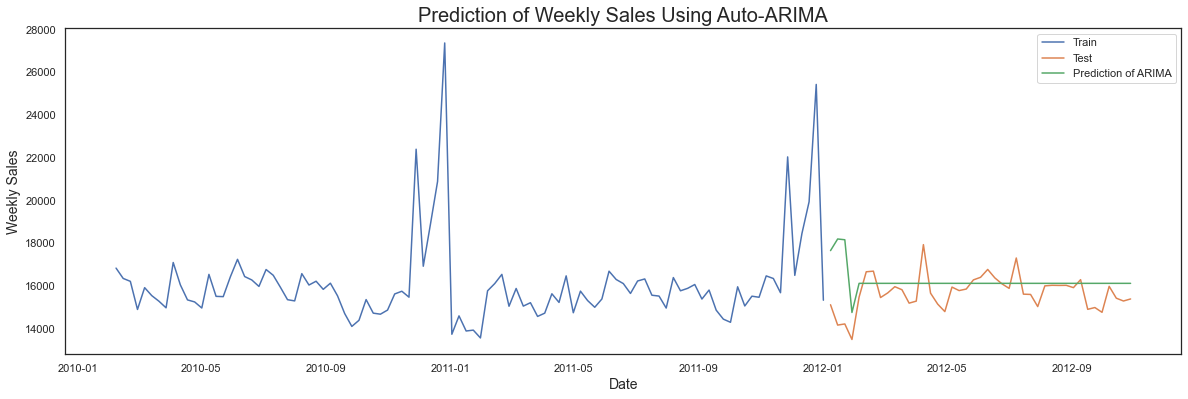

In [79]:
y_pred = model_auto_arima.predict(n_periods=len(y_test))
y_pred1 = pd.DataFrame(y_pred,index = y_test.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred1, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [80]:
def wmae_test(data,test, pred): # WMAE for test
    weights = data['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [81]:
# Performance metric for ARIMA model -MSE/RMSE
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(y_test, y_pred))
print('Weighted Mean Absolute Error (WMAE) of ARIMA: ', wmae_test(X_test, y_test, y_pred))

Mean Squared Error (MSE) of ARIMA:  1390182.72554275
Root Mean Squared Error (RMSE) of ARIMA:  1179.060102599842
Mean Absolute Deviation (MAD) of ARIMA:  790.4687167130347
Weighted Mean Absolute Error (WMAE) of ARIMA:  722.4388416652158


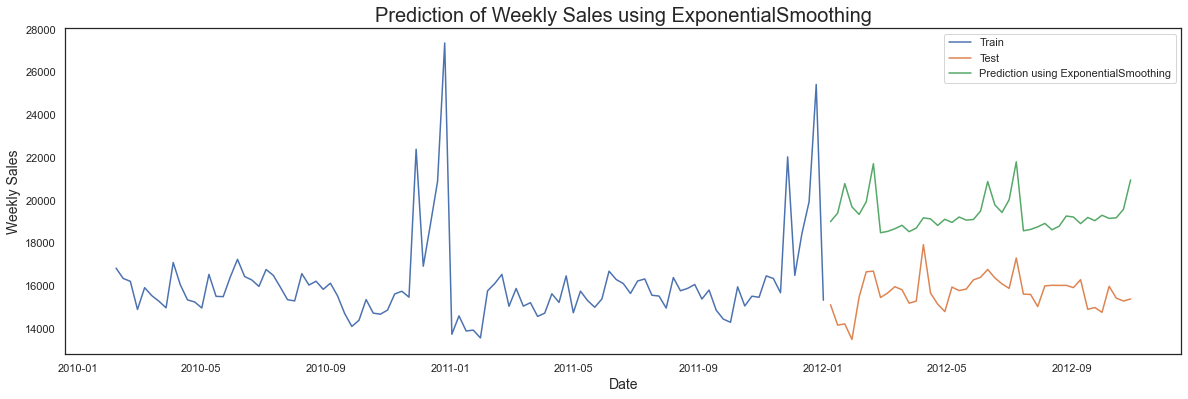

In [82]:
model_holt_winters = ExponentialSmoothing(y_train, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(y_test))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [83]:
# Performance metric for ARIMA model -MSE/RMSE
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(y_test, y_pred))
print('Weighted Mean Absolute Error (WMAE) of ARIMA: ', wmae_test(X_test, y_test, y_pred))

Mean Squared Error (MSE) of ARIMA:  14361452.395099772
Root Mean Squared Error (RMSE) of ARIMA:  3789.6506956578164
Mean Absolute Deviation (MAD) of ARIMA:  3659.6305391768196
Weighted Mean Absolute Error (WMAE) of ARIMA:  3548.5339141061086


## Autoencoder

In [84]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import tensorflow as tf 

In [85]:
train_auto = df_train_feats.copy()
test_auto = df_test_feats.copy()

In [86]:
y = train_auto['Weekly_Sales']
X = train_auto.drop(['Weekly_Sales'], axis=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [87]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(295099, 9) (295099,)
(126471, 9) (126471,)


In [88]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(295099, 9) (295099,)
(126471, 9) (126471,)


In [89]:
# define encoder
n_inputs = X_train.shape[1]
visible = Input(shape=(n_inputs,))
e = Dense(8, activation='relu')(visible)
e = Dense(6, activation='relu')(e)
e = Dense(4, activation='relu')(e)
e = Dense(2, activation='relu')(e)
# e = BatchNormalization()(e)
#e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [90]:
# define decoder
d = Dense(4, activation='relu')(bottleneck)
d = Dense(6, activation='relu')(d)
d = Dense(8, activation='relu')(d)
d = Dense(9, activation='relu')(d)
# d = BatchNormalization()(d)
#d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [91]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 9)                 27        
                                                                 
 dense_5 (Dense)             (None, 4)                 40    

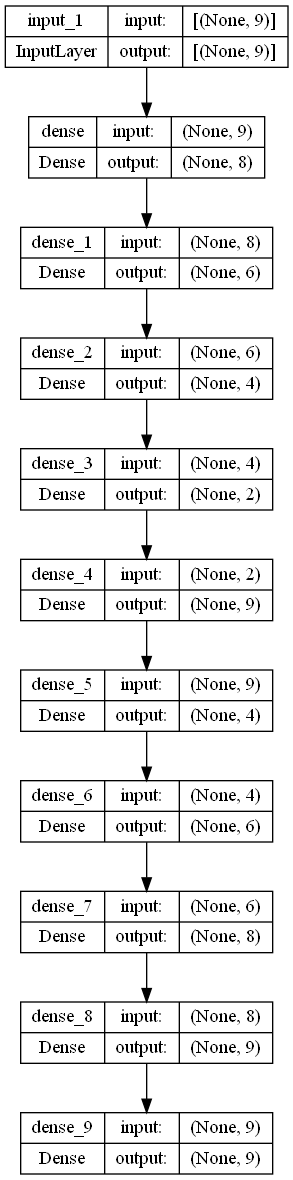

In [92]:
# plot the autoencoder
import pydot 
import graphviz
plot_model(model, 'autoencoder.png', show_shapes=True)

In [93]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_test,X_test))

Epoch 1/5
9222/9222 [==============================] - 39s 4ms/step - loss: 0.0670 - val_loss: 0.0457
Epoch 2/5
9222/9222 [==============================] - 30s 3ms/step - loss: 0.0456 - val_loss: 0.0454
Epoch 3/5
9222/9222 [==============================] - 32s 3ms/step - loss: 0.0443 - val_loss: 0.0432
Epoch 4/5
9222/9222 [==============================] - 31s 3ms/step - loss: 0.0432 - val_loss: 0.0431
Epoch 5/5
9222/9222 [==============================] - 31s 3ms/step - loss: 0.0431 - val_loss: 0.0430


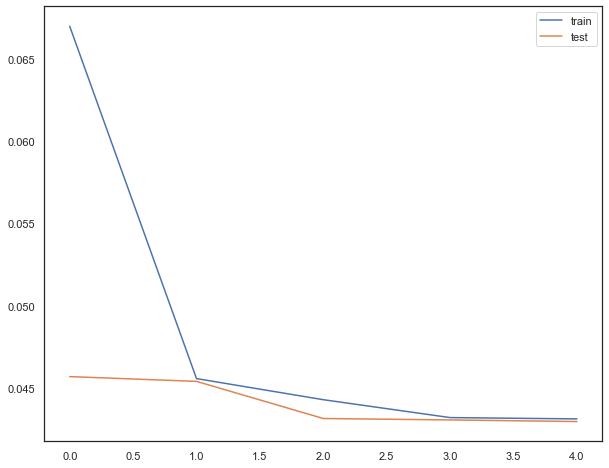

In [94]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

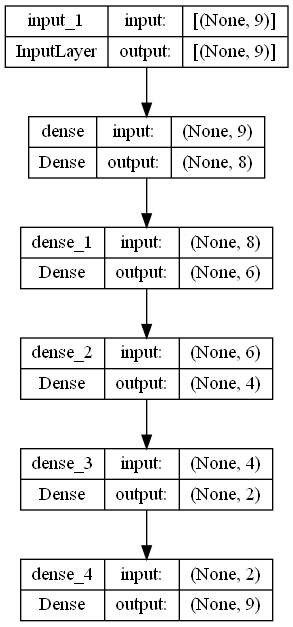

In [95]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)

In [96]:
# save the encoder to file
encoder.save('encoder.h5')

## Modeling

In [97]:
y = df_train_feats['Weekly_Sales']
X = df_train_feats.drop(['Weekly_Sales'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.

In [98]:
# Final shapes.
print('Train:', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train: (295099, 9) (295099,)
Test (126471, 9) (126471,)


In [99]:
def wmae(data,test, pred): # WMAE for test
    weights = data['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [100]:
encoder = load_model('encoder.h5')

In [101]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

3953/3953 [==============================] - 7s 2ms/step


## Linear Regression

In [102]:
# model without auto encoder
model_lr = LinearRegression(fit_intercept=True,normalize=True).fit(X_train,y_train) # Fit the model.
y_pred_train_lr = model_lr.predict(X_train) # Predict train data.
y_pred_test_lr = model_lr.predict(X_test) # Predict test data.

In [103]:
print("Train WMAE-", wmae(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", wmae(X_test, y_test, y_pred_test_lr))
print("Train RMSE:", mean_squared_error(y_train, y_pred_train_lr, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test_lr, squared=False))

Train WMAE- 14788.164661075396
Test WMAE- 14793.497882623604
Train RMSE: 21738.484242160088
Test RMSE: 21668.549327834833


In [104]:
#model with auto encoder
model_lr1 = LinearRegression(fit_intercept=True,normalize=True).fit(X_train_encode,y_train)
y_pred_train_lr = model_lr1.predict(X_train_encode) # Predict train data.
#y_pred_cv_lr = model_lr1.predict(X_cv_encode) # Predict cv data.
y_pred_test_lr = model_lr1.predict(X_test_encode) # Predict test data.

In [105]:
y_pred_test_lr

array([ 8814.628, 14813.233, 17647.86 , ..., 17923.57 , 21391.016,
       14809.515], dtype=float32)

In [106]:
print("Train WMAE-", wmae(X_train, y_train, y_pred_train_lr))
#print("CV WMAE-", wmae(X_cv, y_cv, y_pred_cv_lr))
print("Test WMAE-", wmae(X_test, y_test, y_pred_test_lr))
print("Train RMSE:", mean_squared_error(y_train, y_pred_train_lr, squared=False))
#print("CV RMSE:", mean_squared_error(y_cv, y_pred_cv_lr, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test_lr, squared=False))

Train WMAE- 14701.16517845238
Test WMAE- 14707.219039773348
Train RMSE: 22047.271299624434
Test RMSE: 21974.94857347439


As we can observe that wmae is decreased when we used auto encoders.

## K-Nearest Neighbour

In [107]:
#model without auto encoder
neigh = KNeighborsRegressor(n_jobs=-1)
parameters = {'n_neighbors':list(range(1,26,3))}
clf = RandomizedSearchCV(neigh, parameters, cv=4)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=KNeighborsRegressor(n_jobs=-1),
                   param_distributions={'n_neighbors': [1, 4, 7, 10, 13, 16, 19,
                                                        22, 25]})

In [108]:
clf.best_estimator_

KNeighborsRegressor(n_jobs=-1, n_neighbors=16)

In [109]:
neigh = KNeighborsRegressor(n_neighbors=16, n_jobs=-1)
neigh.fit(X_train, y_train)
y_tr_knn = neigh.predict(X_train)
y_test_knn = neigh.predict(X_test)

In [110]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_knn))
print("Test WMAE-", wmae(X_test, y_test, y_test_knn))
print("Train RMSE:", mean_squared_error(y_train, y_tr_knn, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_knn, squared=False))

Train WMAE- 9708.12301489663
Test WMAE- 10274.346245789704
Train RMSE: 15174.265588761427
Test RMSE: 16017.599378010771


In [111]:
#model with auto encoder
neigh = KNeighborsRegressor(n_jobs=-1)
parameters = {'n_neighbors':list(range(1,26,3))}
clf = RandomizedSearchCV(neigh, parameters, cv=4)
clf.fit(X_train_encode, y_train)

RandomizedSearchCV(cv=4, estimator=KNeighborsRegressor(n_jobs=-1),
                   param_distributions={'n_neighbors': [1, 4, 7, 10, 13, 16, 19,
                                                        22, 25]})

In [112]:
clf.best_estimator_

KNeighborsRegressor(n_jobs=-1, n_neighbors=25)

In [113]:
neigh = KNeighborsRegressor(n_neighbors=16, n_jobs=-1)
neigh.fit(X_train_encode, y_train)
y_tr_knn = neigh.predict(X_train_encode)
#y_cv_knn = neigh.predict(X_cv_encode)
y_test_knn = neigh.predict(X_test_encode)

In [114]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_knn))
#print("CV WMAE-", wmae(X_cv, y_cv, y_cv_knn))
print("Test WMAE-", wmae(X_test, y_test, y_test_knn))
print("Train RMSE:", mean_squared_error(y_train, y_tr_knn, squared=False))
#print("CV RMSE:", mean_squared_error(y_cv, y_cv_knn, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_knn, squared=False))

Train WMAE- 13810.402827156695
Test WMAE- 14656.970723161952
Train RMSE: 20842.658376918294
Test RMSE: 22070.26042372896


## Decision Tree

In [115]:
#model without auto encoder
dt = DecisionTreeRegressor()
parametres = {'max_depth': [1,5,10,15,20,25,30,35], 'min_samples_leaf': [1,2,3,4,5,6,7,8]}
clf = RandomizedSearchCV(dt, parametres, cv=4)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8]})

In [116]:
clf.best_estimator_

DecisionTreeRegressor(max_depth=25, min_samples_leaf=3)

In [117]:
dt = DecisionTreeRegressor(max_depth=30,min_samples_leaf=3)
dt.fit(X_train, y_train)
y_tr_dt = dt.predict(X_train)
y_test_dt = dt.predict(X_test)

In [118]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_dt))
print("Test WMAE-", wmae(X_test, y_test, y_test_dt))
print("Train RMSE:", mean_squared_error(y_train, y_tr_dt, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_dt, squared=False))

Train WMAE- 954.3309993644573
Test WMAE- 1791.3872931876085
Train RMSE: 2378.554542134274
Test RMSE: 4007.6376513706928


In [119]:
# model with auto encoder
dt = DecisionTreeRegressor()
parametres = {'max_depth': [1,5,10,15,20,25,30,35], 'min_samples_leaf': [1,2,3,4,5,6,7,8]}
clf = RandomizedSearchCV(dt, parametres, cv=3)
clf.fit(X_train_encode, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8]})

In [120]:
clf.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)

In [121]:
dt = DecisionTreeRegressor(max_depth=20,min_samples_leaf=7)
dt.fit(X_train_encode, y_train)
y_tr_dt = dt.predict(X_train_encode)
y_test_dt = dt.predict(X_test_encode)

In [122]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_dt))
print("Test WMAE-", wmae(X_test, y_test, y_test_dt))
print("Train RMSE:", mean_squared_error(y_train, y_tr_dt, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_dt, squared=False))

Train WMAE- 13567.807404595958
Test WMAE- 14719.370678444942
Train RMSE: 20665.420327616222
Test RMSE: 22150.30695857608


## Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
# model without auto encoder
rf = RandomForestRegressor()
parametres = {'max_depth':[1,5,10,15,20,25,30,35,40,45,50],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100,110]}
clf = RandomizedSearchCV(rf, parametres, cv=3)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]})

In [125]:
clf.best_estimator_

RandomForestRegressor(max_depth=45, n_estimators=40)

In [126]:
rf = RandomForestRegressor(max_depth=40,
                      n_estimators=90)
rf.fit(X_train, y_train)
y_tr_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

In [127]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_rf))
print("Test WMAE-", wmae(X_test, y_test, y_test_rf))
print("Train RMSE:", mean_squared_error(y_train, y_tr_rf, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_rf, squared=False))

Train WMAE- 541.9979231069057
Test WMAE- 1452.198796802305
Train RMSE: 1266.727478417757
Test RMSE: 3145.553423731858


In [128]:
# model with auto encoder
rf1 = RandomForestRegressor()
parametres = {'max_depth':[1,5,10,15,20,25,30,35,40,45,50], 'n_estimators':[10,20,30,40,50,60,70,80,90,100,110]}
clf = RandomizedSearchCV(rf1, parametres, cv=4)
clf.fit(X_train_encode, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]})

In [129]:
clf.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=20)

In [130]:
rf1 = RandomForestRegressor(max_depth=35, n_estimators=10)
rf1.fit(X_train_encode, y_train)
y_tr_rf = rf1.predict(X_train_encode)
y_test_rf = rf1.predict(X_test_encode)

In [131]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_rf))
print("Test WMAE-", wmae(X_test, y_test, y_test_rf))
print("Train RMSE:", mean_squared_error(y_train, y_tr_rf, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_rf, squared=False))

Train WMAE- 9387.676940318379
Test WMAE- 15706.99783685571
Train RMSE: 15346.735122354667
Test RMSE: 24295.808397395198


## xgBoost

In [132]:
# model without auto encoder
xg1 = XGBRegressor()
parametres = {'max_depth':[1,5,10,15,20,25,30,35,40,45,50], 'n_estimators':[10,20,30,40,50,60,70,80,90,100,110]}
clf = RandomizedSearchCV(xg1, parametres, cv=4, n_jobs=-1)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          max_delta_step=None, max_depth=None,
                           

In [133]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [134]:
xg1 = XGBRegressor(max_depth=10, n_estimators=100)
xg1.fit(X_train, y_train)
y_tr_xg = xg1.predict(X_train)
y_test_xg = xg1.predict(X_test)

In [135]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_xg))
print("Test WMAE-", wmae(X_test, y_test, y_test_xg))
print("Train RMSE:", mean_squared_error(y_train, y_tr_xg, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_xg, squared=False))

Train WMAE- 1149.7335429913317
Test WMAE- 1551.4710622595928
Train RMSE: 1937.0306515737234
Test RMSE: 2821.3460142474455


In [136]:
# model with auto encoder
xg = XGBRegressor()
parametres = {'max_depth':[1,5,10,15,20,25,30,35,40,45,50], 'n_estimators':[10,20,30,40,50,60,70,80,90,100,110]}
clf = RandomizedSearchCV(xg, parametres, cv=4)
clf.fit(X_train_encode, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          max_delta_step=None, max_depth=None,
                           

In [137]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [138]:
xg = XGBRegressor(max_depth=20, n_estimators=110)
xg.fit(X_train_encode, y_train)
y_tr_xg = xg.predict(X_train_encode)
y_test_xg = xg.predict(X_test_encode)

In [139]:
print("Train WMAE-", wmae(X_train, y_train, y_tr_xg))
print("Test WMAE-", wmae(X_test, y_test, y_test_xg))
print("Train RMSE:", mean_squared_error(y_train, y_tr_xg, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_xg, squared=False))

Train WMAE- 10946.531895603817
Test WMAE- 14938.739252780193
Train RMSE: 16992.14663141137
Test RMSE: 23042.418737578555


In [81]:
pretty_table = PrettyTable()
pretty_table.field_names = ['Model', 'WMAE', 'RMSE']
pretty_table.add_row(['Linear Regression(without auto_encoder)', 14793.497, 21668.549])
pretty_table.add_row(['Linear Regression(with auto_encoder)', 14707.219, 21974.948])
pretty_table.add_row(['\n', '\n', '\n'])
pretty_table.add_row(['KNN(without auto_encoder)', 10274.346, 16017.599])
pretty_table.add_row(['KNN(with auto_encoder)', 14656.970, 22070.260])
pretty_table.add_row(['\n', '\n', '\n'])
pretty_table.add_row(['Decision Tree(without auto_encoder)', 1791.387, 4007.637])
pretty_table.add_row(['Decision Tree(with auto_encoder)', 14719.370, 22150.306])
pretty_table.add_row(['\n', '\n', '\n'])
pretty_table.add_row(['Random Forest(without auto_encoder)', 1452.198, 3145.553])
pretty_table.add_row(['Random Forest(with auto_encoder)', 15706.997, 24295.808])
pretty_table.add_row(['\n', '\n', '\n'])
pretty_table.add_row(['XGBRegressor(without auto_encoder)', 1551.47, 2821.34])
pretty_table.add_row(['XGBRegressor(with auto_encoder)', 14938.73, 23042.41])
print(pretty_table)

+-----------------------------------------+-----------+-----------+
|                  Model                  |    WMAE   |    RMSE   |
+-----------------------------------------+-----------+-----------+
| Linear Regression(without auto_encoder) | 14793.497 | 21668.549 |
|   Linear Regression(with auto_encoder)  | 14707.219 | 21974.948 |
|                                         |           |           |
|                                         |           |           |
|        KNN(without auto_encoder)        | 10274.346 | 16017.599 |
|          KNN(with auto_encoder)         |  14656.97 |  22070.26 |
|                                         |           |           |
|                                         |           |           |
|   Decision Tree(without auto_encoder)   |  1791.387 |  4007.637 |
|     Decision Tree(with auto_encoder)    |  14719.37 | 22150.306 |
|                                         |           |           |
|                                         |     

In [141]:
date = test['Date']
test_relevant = test.drop(['Date','Temperature','Fuel_Price','CPI', 'Unemployment'], axis=1)
test_relevant

,Store,IsHoliday,Type,Size,Dept,Month,Week,Year,day
0,1,0,3,151315,1,11,44,2012,2
1,1,0,3,151315,2,11,44,2012,2
2,1,0,3,151315,3,11,44,2012,2
3,1,0,3,151315,4,11,44,2012,2
4,1,0,3,151315,5,11,44,2012,2
...,...,...,...,...,...,...,...,...,...
115059,45,0,2,118221,93,7,30,2013,26
115060,45,0,2,118221,94,7,30,2013,26
115061,45,0,2,118221,95,7,30,2013,26
115062,45,0,2,118221,97,7,30,2013,26


In [142]:
test_relevant = test_relevant.sort_values(['Store', 'Dept'], ascending=[True, True])
test_relevant

,Store,IsHoliday,Type,Size,Dept,Month,Week,Year,day
0,1,0,3,151315,1,11,44,2012,2
71,1,0,3,151315,1,11,45,2012,9
142,1,0,3,151315,1,11,46,2012,16
213,1,3,3,151315,1,11,47,2012,23
285,1,0,3,151315,1,11,48,2012,30
...,...,...,...,...,...,...,...,...,...
114798,45,0,2,118221,98,6,26,2013,28
114863,45,0,2,118221,98,7,27,2013,5
114930,45,0,2,118221,98,7,28,2013,12
114997,45,0,2,118221,98,7,29,2013,19


In [143]:
y_pred_rf = rf.predict(test_relevant)

In [144]:
y_pred_rf

array([35716.49377778, 20761.65744444, 19963.27055556, ...,
         708.74044444,   740.38288889,   697.76066667])

In [145]:
test_relevant['Date'] = date
test_relevant = test_relevant.sort_values(['Store', 'Dept'], ascending=[True, True])
test_relevant['Weekly_Sales'] = y_pred_rf
test_relevant

,Store,IsHoliday,Type,Size,Dept,Month,Week,Year,day,Date,Weekly_Sales
0,1,0,3,151315,1,11,44,2012,2,2012-11-02,35716.493778
71,1,0,3,151315,1,11,45,2012,9,2012-11-09,20761.657444
142,1,0,3,151315,1,11,46,2012,16,2012-11-16,19963.270556
213,1,3,3,151315,1,11,47,2012,23,2012-11-23,20993.517111
285,1,0,3,151315,1,11,48,2012,30,2012-11-30,30752.062889
...,...,...,...,...,...,...,...,...,...,...,...
114798,45,0,2,118221,98,6,26,2013,28,2013-06-28,675.568667
114863,45,0,2,118221,98,7,27,2013,5,2013-07-05,693.702444
114930,45,0,2,118221,98,7,28,2013,12,2013-07-12,708.740444
114997,45,0,2,118221,98,7,29,2013,19,2013-07-19,740.382889


In [146]:
sampleSubmission = pd.read_csv('sampleSubmission.csv', sep=',')

In [147]:
sampleSubmission['Weekly_Sales'] = y_pred_rf
sampleSubmission.to_csv('submission.csv',index=False)
sampleSubmission

,Id,Weekly_Sales
0,1_1_2012-11-02,35716.493778
1,1_1_2012-11-09,20761.657444
2,1_1_2012-11-16,19963.270556
3,1_1_2012-11-23,20993.517111
4,1_1_2012-11-30,30752.062889
...,...,...
115059,45_98_2013-06-28,675.568667
115060,45_98_2013-07-05,693.702444
115061,45_98_2013-07-12,708.740444
115062,45_98_2013-07-19,740.382889
